# csv 파일 로드.

In [154]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('vgames2.csv', index_col = 0)
#df.drop('Unnamed: 0', axis=1,inplace=True) 
df


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


## 데이터 정제 (EDA)


year error cnt = 371
pop cnt = 16598
0.02


array([[<AxesSubplot:title={'center':'Year'}>]], dtype=object)

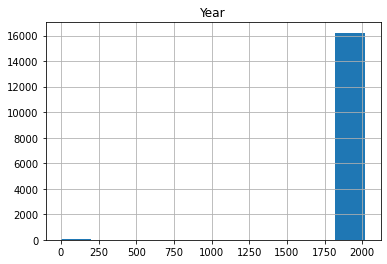

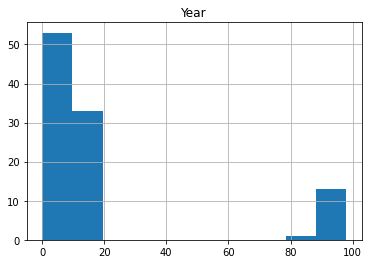

In [155]:
df_year_error= df[ (df['Year'].isnull()) | (df['Year'] < 250)]

print( 'year error cnt =',df_year_error.shape[0])
print( 'pop cnt =',df.shape[0])

print( round( df_year_error.shape[0] / df.shape[0] ,2))

# 데이터를 살펴본 결과
# 연도가 Nan or 0인 결측치, 그리고 250 이하의 이상치 데이터가 
# 전체데이터의 0.02%라서 제거하기로 결정했습니다.

# histogram 으로 250이하의 값도 이상치라고 판단.  

df.hist( 'Year')
df_year_error.hist( 'Year') 
 

In [156]:
df[df.duplicated()]
#중복값도 찾았으나 Year이 0이므로 결측치 제거할때 함께 제거.

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9185,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0


In [157]:
df1 = df.copy()

# 데이터 제거.
del_con_byYear = df_year_error.index
df1.drop(del_con_byYear, inplace=True)


#장르고,퍼블리셔고 일단 nan 이면 제거. 
df1.dropna(inplace=True)
df1.reset_index(drop=True,inplace = True)


#year int로 변환
df1['Year'] = df1['Year'].astype(int)

df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16141 entries, 0 to 16140
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16141 non-null  object
 1   Platform     16141 non-null  object
 2   Year         16141 non-null  int32 
 3   Genre        16141 non-null  object
 4   Publisher    16141 non-null  object
 5   NA_Sales     16141 non-null  object
 6   EU_Sales     16141 non-null  object
 7   JP_Sales     16141 non-null  object
 8   Other_Sales  16141 non-null  object
dtypes: int32(1), object(8)
memory usage: 1.0+ MB


In [158]:
# 숫자만 들어있어야 할 컬럼에 M,K라는 스트링이 존재
# 보통 100만을 M, 1000을 K로 대체해서 사용 함. 
# 숫자로 대체 하면 

sales = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales'] 

# 방법 1.
# 일단 삭제
def delete_MK():
    
    s1 = set([])
    for v in sales:
        idx = df1[ (df1[v].str.count('M')>0) | (df1[v].str.count('K')>0) ].index
        s1.update(idx)
    #print(s1)
    #print( 'total=', len(s1) / df1.shape[0] )

    df1.drop( s1, inplace=True)
    df1.reset_index(drop=True,inplace = True)




# 방법2.
# M, K데이터 들어있는 데이터 변환.
def convertMK(ss):

    if type(ss) == float :
        pass
    
    elif ss.count('M')>0:
        ss = float(ss.split('M')[0])#*1000000
    
    elif ss.count('K')>0:
        ss = float(ss.split('K')[0])#*1000
    
    return float(ss) 

def change_MK():
    for c in sales:
        res=[]
        for v in df1[c]:
            res.append(convertMK(v))

        df1.loc[ :, c] = res
        

#방법1 
delete_MK()
#방법2
#change_MK()

#숫자로 타입변경
df1[sales] = df1[sales].astype(float)
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15382 entries, 0 to 15381
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         15382 non-null  object 
 1   Platform     15382 non-null  object 
 2   Year         15382 non-null  int32  
 3   Genre        15382 non-null  object 
 4   Publisher    15382 non-null  object 
 5   NA_Sales     15382 non-null  float64
 6   EU_Sales     15382 non-null  float64
 7   JP_Sales     15382 non-null  float64
 8   Other_Sales  15382 non-null  float64
dtypes: float64(4), int32(1), object(4)
memory usage: 1021.6+ KB


In [160]:
# 지역별 판매량...
df1[sales].sum()


NA_Sales       4055.22
EU_Sales       2251.70
JP_Sales       1192.14
Other_Sales     743.86
dtype: float64

In [161]:
#지역에 따라서 선호하는 게임 장르가 다를까?
#선호하는 게임은 많이 팔린 게임이라고 가정.
#지역별 많이 팔린 장르별 내림차순.

# - [x]  지역으로 그룹화
# - [x]  많이 팔린 게임 순 정렬
# - [x]  어느지역에서 어떤 장르가 많이 팔렸는지 시각화


df1['Total_Sales'] = df1['NA_Sales'] + df1['EU_Sales'] + df1['JP_Sales'] + df1['Other_Sales']

salesAll =[x for x in sales]
salesAll.append('Total_Sales')
salesAll


df_Genre = df1.groupby('Genre')[salesAll].sum()
df_Genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,801.89,486.60,149.85,176.14,1614.48
Adventure,97.29,60.65,49.20,16.06,223.20
Fighting,210.51,94.18,82.58,34.33,421.60
Misc,380.36,200.14,99.47,69.97,749.94
Platform,410.96,184.11,121.88,47.88,764.83
Puzzle,118.40,49.95,56.16,12.13,236.64
Racing,334.14,222.66,50.60,73.48,680.88
Role-Playing,283.86,160.10,314.15,50.86,808.97
Shooter,544.63,293.38,36.53,96.68,971.22


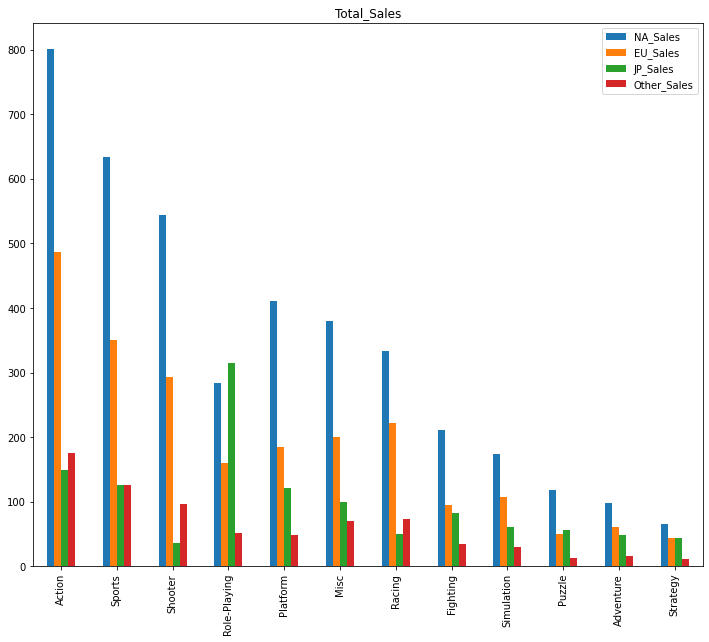

In [162]:
#df_Genre  

df_Genre.sort_values(by='Total_Sales',ascending=False,inplace=True)
df_Genre[sales].plot.bar( xlabel='', title='Total_Sales',figsize=(12,10))
plt.show();


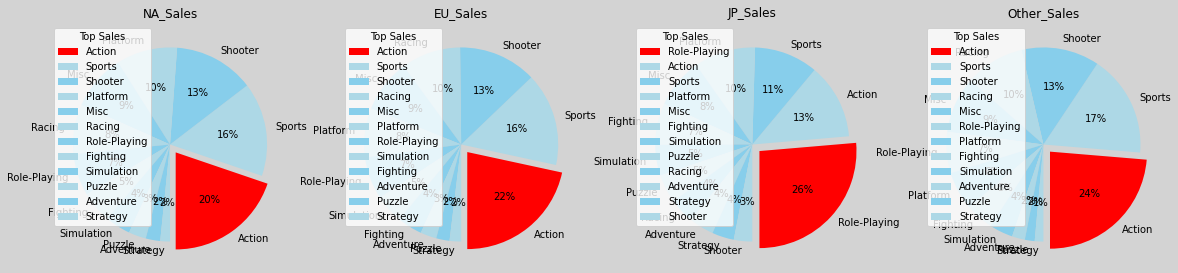

In [163]:

def ShowPie(isAll):
    
    fig, ax = plt.subplots(figsize = (20,12))
    ax.grid(True)
    fig.set_facecolor('lightgrey')

    for i,v in enumerate(sales):
        
        df_sorted = df_Genre.sort_values(by=v,ascending=False)[v]
        
        if isAll == False:
            df_sorted = df_sorted.head(3)

        #Series 의 컬럼은 index
        mylabels = df_sorted.index
        # series 개수 만큼 넣어줘야함. index 순서. 가운데서 얼만큼 떨어트릴것인가?
        myExplode = [0 for _ in mylabels] 
        myExplode[0] = 0.1
        
        myColor = [ 'skyblue' if i%2==0 else 'lightblue' for i,x in enumerate(myExplode)] 
        myColor[0] = 'red'

        plt.subplot(1, 4, i+1)
        plt.pie( df_sorted , autopct='%.0f%%',labels = mylabels,explode = myExplode, startangle = 270, colors=myColor )
        plt.title(v)
        plt.legend(title = "Top Sales",loc='upper left') 
        
    plt.show();

ShowPie(True)


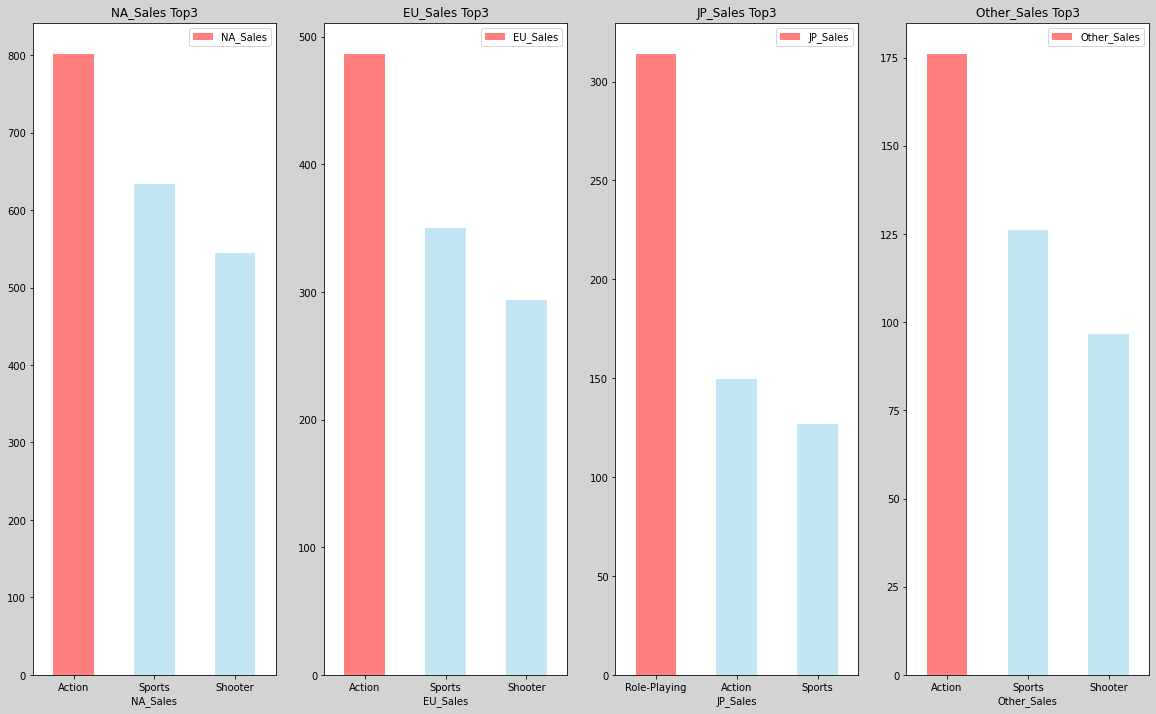

In [308]:

# 위 표를 보면 지역별 각 장르의 판매량입니다. 각 장르의 Top3가 전체의 50% 가까이 되기때문에 
# top3의 판매량만 조회해도 어떤 장르를 선호하는지 알 수 있습니다.
# JP지역은 롤플레잉을 선호하고 그외에 NA,EU,Other 지역은 액션을 선호하는것을 알 수 있습니다.


#지역별 top3
fig, ax = plt.subplots(figsize = (20,12))
fig.set_facecolor('lightgrey')

for i,v in enumerate(sales):
    
    df_sorted = df_Genre.sort_values(by=v,ascending=False)[v].head(3)
    mylabels = df_sorted.index
    colors = ['skyblue' for _ in range(len(mylabels))]
    colors[0] = 'r'

    plt.subplot(1, 4, i+1)
    df_sorted.plot.bar(xlabel=v, title=v+' Top3', color=colors, rot=0, alpha=0.5,legend=True)#,xtick=100)
    #plt.bar( x= df_sorted.index, height=df_sorted.values,color=colors, alpha=0.5 ,width = .5)
    
plt.show()



In [371]:
 
## df1['Total_Sales'] = df1['NA_Sales'] + df1['EU_Sales'] + df1['JP_Sales'] + df1['Other_Sales']
# salesAll

df_gy = df1[ ['Year','Genre','Total_Sales']]
df_gy = df_gy.groupby(['Year','Genre']).sum()
df_gy = df_gy.sort_values( by='Year')
df_gy

Total_Sales
Year Genre                    
1980 Action               0.34
     Fighting             0.77
     Misc                 2.47
     Shooter              7.07
1981 Simulation           0.44
...                        ...
2016 Adventure            1.48
     Action              19.62
     Racing               1.62
2017 Action               0.01
     Role-Playing         0.04

[386 rows x 1 columns]

In [330]:
#연도별 게임의 트렌드가 있을까 ? 
# - [x]  연도별 장르 나누기
# - [ ]  연도별로 많이 팔린 장르 시각화

df_gy['Year2'] = df_gy.index
df_g1 = df_gy[ ['Year2','Total_Sales']]
df_g1 = df_g1.reset_index(drop=True)
df_g1


,Year2,Total_Sales
0,"(2017, Role-Playing)",0.04
1,"(2017, Action)",0.01
2,"(2016, Action)",19.62
3,"(2016, Shooter)",13.68
4,"(2016, Sports)",9.61
...,...,...
381,"(1981, Simulation)",0.44
382,"(1980, Shooter)",7.07
383,"(1980, Misc)",2.47
384,"(1980, Fighting)",0.77


In [384]:

years = []
genre = []

for v in df_g1['Year2']:
    years.append(v[0])
    genre.append(v[1])

df_g1['Year'] = years
df_g1['Genre'] = genre


df_g2 = df_g1[ ['Year','Genre','Total_Sales'] ]
df_g2.sort_values(by ='Year')
df_g2 = df_g2.reset_index(drop=True)
df_g2T = df_g2.T


df_g2T.columns = df_g2T.iloc[0,:]
df_g2T = df_g2T.iloc[1:,:]
df_g2T



Year,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,...,1981,1981,1981,1981,1981,1981,1980,1980,1980,1980
Genre,Role-Playing,Action,Action,Shooter,Sports,Role-Playing,Fighting,Platform,Racing,Adventure,...,Shooter,Platform,Puzzle,Sports,Racing,Simulation,Shooter,Misc,Fighting,Action
Total_Sales,0.04,0.01,19.62,13.68,9.61,6.52,3.83,2.08,1.62,1.48,...,10.02,6.92,2.25,0.78,0.48,0.44,7.07,2.47,0.77,0.34


In [391]:
df_g3= df_g2T.T
#df_g3[df_g3['Year'] <=2000].plot.bar( xlabel='', title='TitleName',figsize=(12,10))
df_g3['Year'] = df_g3.index
df_g3

,Genre,Total_Sales,Year
Year,,,
2017,Role-Playing,0.04,2017
2017,Action,0.01,2017
2016,Action,19.62,2016
2016,Shooter,13.68,2016
2016,Sports,9.61,2016
...,...,...,...
1981,Simulation,0.44,1981
1980,Shooter,7.07,1980
1980,Misc,2.47,1980


In [367]:
df_t = df_g2[ (df_g2['Year'] >= 1980) & (df_g2['Year'] <= 1990) ]
df_t = df_t[df_t['Genre'] == 'Action']
df_t.index= df_t['Year']
df_t = df_t.drop('Year', axis=1)
df_t.T
#df_t.plot.bar( xlabel='', title='Sales',figsize=(12,10),rot=0)

#plt.show();

#df_g2.plot.bar( xlabel='', title='TitleName',figsize=(12,10))

Year,1990,1989,1988,1987,1986,1985,1984,1983,1982,1981,1980
Genre,Action,Action,Action,Action,Action,Action,Action,Action,Action,Action,Action
Total_Sales,6.39,4.65,1.74,1.11,13.74,3.52,1.85,2.86,6.5,12.82,0.34


In [167]:

#출고량이 높은 게임에 대한 분석 및 시각화 프로세스



## 정리
> #지역에 따라서 선호하는 게임 장르가 다를까? 
 - yes

> #연도별 게임의 트렌드가 있을까 ?
 - ...

> #출고량이 높은 게임에 대한 분석 및 시각화 프로세스
 - 작업중.

### 🔥 FrameWork

blah blah

In [168]:
# code